In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
df=pd.read_csv('spam.csv')

In [ ]:
df.shape

(5572, 2)

In [ ]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.isnull().sum()

,0
Category,0
Message,0


In [ ]:
df.duplicated().sum()

np.int64(415)

In [ ]:
df1=df.drop_duplicates(keep='first')

In [ ]:
df1.shape

(5157, 2)

##1. Data Cleaning

In [ ]:
#renaming Message feature to lowercase
df1.rename(columns={'Message':'message'},inplace=True)

/tmp/ipython-input-2449859810.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.rename(columns={'Message':'message'},inplace=True)


In [ ]:
#The target column was label-encoded, where ‘ham’ was mapped to 0 and ‘spam’ was mapped to 1 for model training.
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [ ]:
df2=df1.copy()

In [ ]:
df2['target']=encoder.fit_transform(df1['Category'])

In [ ]:
df2

,Category,message,target
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will ü b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


In [ ]:
# dropped category feature
df2.drop('Category',axis=1,inplace=True)

In [ ]:
df2

,message,target
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...
5567,This is the 2nd time we have tried 2 contact u...,1
5568,Will ü b going to esplanade fr home?,0
5569,"Pity, * was in mood for that. So...any other s...",0
5570,The guy did some bitching but I acted like i'd...,0


## 2. EDA

In [ ]:
df2['target'].value_counts()

,count
target,
0,4516
1,641


([<matplotlib.patches.Wedge at 0x7db84666cb90>,
 [Text(-1.0171946362150524, 0.41870642705280725, '0'),
  Text(1.0171945729921292, -0.4187065806449194, '1')],
 [Text(-0.554833437935483, 0.22838532384698573, '87.57'),
  Text(0.5548334034502522, -0.22838540762450146, '12.43')])

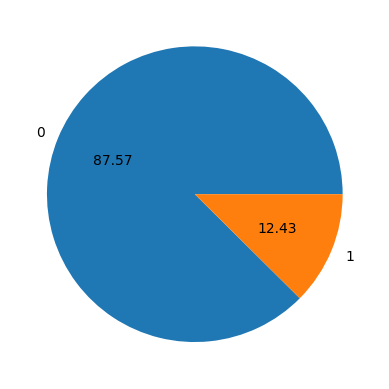

In [ ]:
import matplotlib.pyplot as plt
plt.pie(df2['target'].value_counts(),labels=['0','1'],autopct='%0.2f')

- Data is highly imbalanced

###Feature engineering

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
df3=df2.copy()

In [ ]:
df3['num_characters']=df2['message'].apply(len)

In [ ]:
df3.head(2)

,message,target,num_characters
0,"Go until jurong point, crazy.. Available only ...",0,111
1,Ok lar... Joking wif u oni...,0,29


In [ ]:
df3['num_words']=df3['message'].apply(lambda x:len(nltk.word_tokenize(x)))

In [ ]:
df3.head(2)

,message,target,num_characters,num_words
0,"Go until jurong point, crazy.. Available only ...",0,111,24
1,Ok lar... Joking wif u oni...,0,29,8


In [ ]:
df3['num_sentences']=df3['message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
df3['num_upper_word']=df3['message'].apply(
    lambda x: sum(1 for word in x.split() if word.isupper())
)


In [ ]:
df3.describe()

,target,num_characters,num_words,num_sentences,num_upper_word
count,5157.000000,5157.000000,5157.000000,5157.000000,5157.000000
mean,0.124297,79.103936,18.560403,1.969750,1.034904
std,0.329952,58.382922,13.405970,1.455526,2.864191
min,0.000000,2.000000,1.000000,1.000000,0.000000
25%,0.000000,36.000000,9.000000,1.000000,0.000000
50%,0.000000,61.000000,15.000000,1.000000,0.000000
75%,0.000000,118.000000,26.000000,2.000000,1.000000
max,1.000000,910.000000,220.000000,38.000000,37.000000


In [ ]:
df3[df3['target']==1][['num_characters','num_words','num_sentences','num_upper_word']].describe()

,num_characters,num_words,num_sentences,num_upper_word
count,641.000000,641.000000,641.000000,641.000000
mean,137.118565,27.667707,2.970359,2.539782
std,30.399707,7.103501,1.485575,2.808257
min,7.000000,2.000000,1.000000,0.000000
25%,130.000000,25.000000,2.000000,1.000000
50%,148.000000,29.000000,3.000000,2.000000
75%,157.000000,32.000000,4.000000,4.000000
max,223.000000,46.000000,9.000000,27.000000


In [ ]:
df3[df3['target']==0][['num_characters','num_words','num_sentences','num_upper_word']].describe()

,num_characters,num_words,num_sentences,num_upper_word
count,4516.000000,4516.000000,4516.000000,4516.000000
mean,70.869353,17.267715,1.827724,0.821302
std,56.708301,13.588065,1.394338,2.807709
min,2.000000,1.000000,1.000000,0.000000
25%,34.000000,8.000000,1.000000,0.000000
50%,53.000000,13.000000,1.000000,0.000000
75%,91.000000,22.000000,2.000000,1.000000
max,910.000000,220.000000,38.000000,37.000000


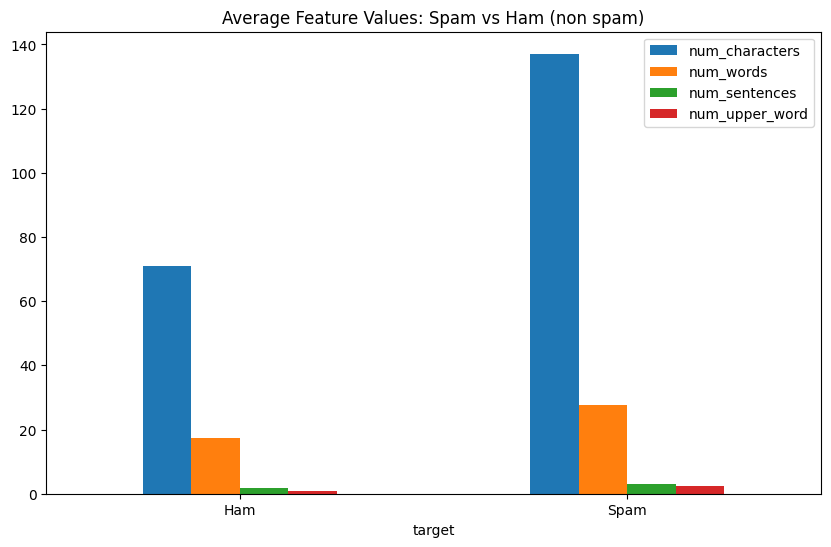

In [ ]:
df3.groupby('target')[['num_characters','num_words','num_sentences','num_upper_word']].mean().plot.bar(figsize=(10,6))
plt.title("Average Feature Values: Spam vs Ham (non spam)")
plt.xticks([0,1], ['Ham','Spam'], rotation=0)
plt.show()


- The bar plot above clearly shows that, on average, spam messages contain more characters, sentences, words, and uppercase words compared to ham messages.

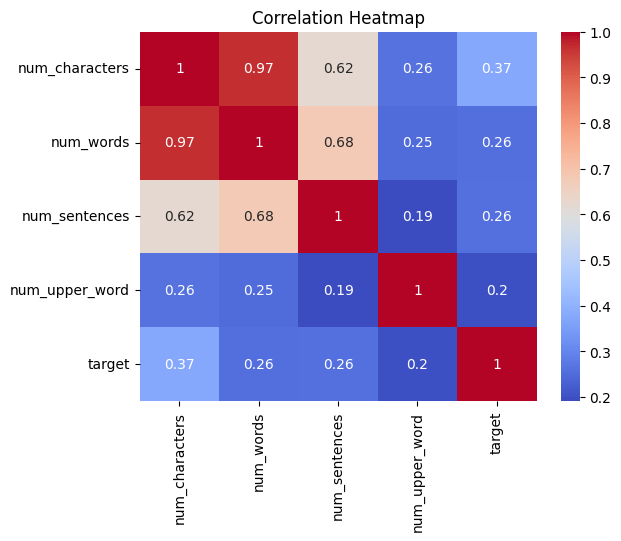

In [ ]:
sns.heatmap(df3[['num_characters','num_words','num_sentences','num_upper_word','target']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


- Dropped the num_characters feature because it was highly correlated (0.97) with num_words and both were basically giving the same information. Since num_words is more useful, I kept that and removed num_characters to avoid redundancy.

In [ ]:
df4=df3.copy()

In [ ]:
df4=df3.drop('num_characters',axis=1)

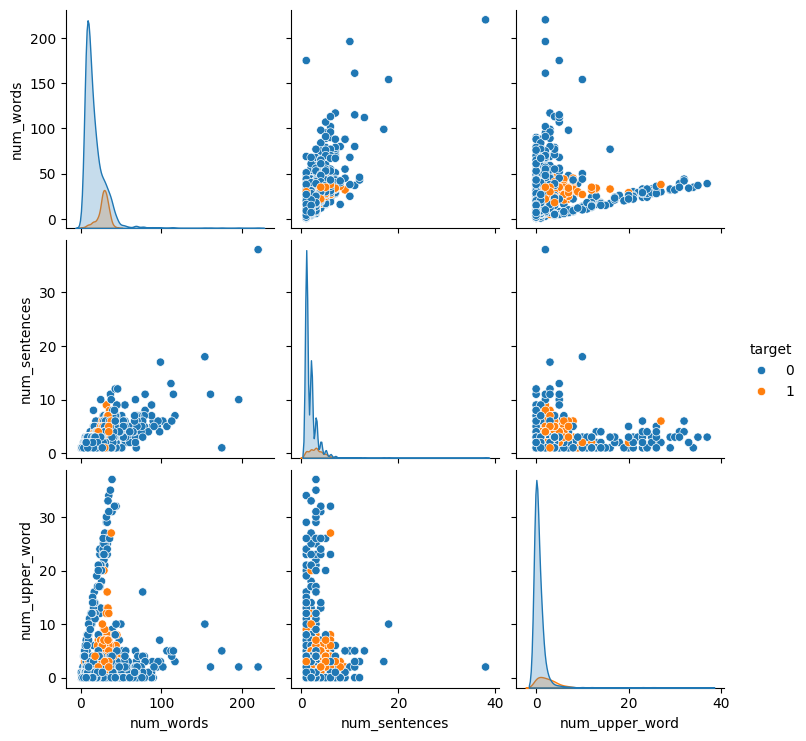

In [ ]:
sns.pairplot(df4,hue='target')

- From the pairplot, I observed that spam messages usually contain more uppercase words and slightly longer content compared to ham, but there is still a big overlap between the two. So these numerical features alone cannot fully separate spam vs ham, but they give some basic patterns.

### Data Preprocessing
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords
import string

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [ ]:
# stopwords.words('english')

In [ ]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()


    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))


    return " ".join(y)

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
transform_text("Here's your weekly dose of news and updates from our community. This week, we cover [topic 1] and [topic 2]. Read more on our blog: [link to blog]. Sincerely, The Newsletter Team")

'weekli dose news updat commun week cover topic 1 topic 2 read blog link blog sincer newslett team'

In [ ]:
df4['transformed_message']=df4['message'].apply(transform_text)

In [ ]:
df4

,message,target,num_words,num_sentences,num_upper_word,transformed_message
0,"Go until jurong point, crazy.. Available only ...",0,24,2,0,go jurong point crazi avail bugi n great world...
1,Ok lar... Joking wif u oni...,0,8,2,0,ok lar joke wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,37,2,2,free entri 2 wkli comp win fa cup final tkt 21...
3,U dun say so early hor... U c already then say...,0,13,1,2,u dun say earli hor u c alreadi say
4,"Nah I don't think he goes to usf, he lives aro...",0,15,1,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,This is the 2nd time we have tried 2 contact u...,1,35,4,2,2nd time tri 2 contact u pound prize 2 claim e...
5568,Will ü b going to esplanade fr home?,0,9,1,0,ü b go esplanad fr home
5569,"Pity, * was in mood for that. So...any other s...",0,15,2,0,piti mood suggest
5570,The guy did some bitching but I acted like i'd...,0,27,1,1,guy bitch act like interest buy someth els nex...


In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [ ]:
spam_wc = wc.generate(df4[df4['target'] == 1]['transformed_message'].str.cat(sep=" "))

Text(0.5, 1.0, 'Spam Messages Word Cloud')

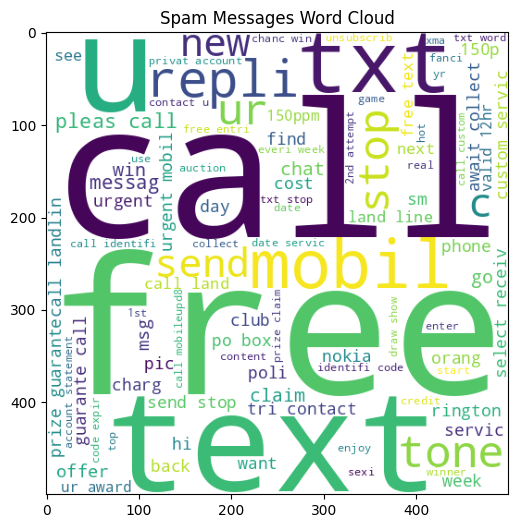

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)
plt.title("Spam Messages Word Cloud")

In [ ]:
spam_corpus = []
for msg in df4[df4['target'] == 1]['transformed_message'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [ ]:
len(set(spam_corpus))

2232

In [ ]:
len(spam_corpus)

9781

In [ ]:
from collections import Counter

In [ ]:
Counter(spam_corpus).most_common(30)

[('call', 311),
 ('free', 186),
 ('2', 154),
 ('txt', 139),
 ('text', 122),
 ('ur', 119),
 ('u', 115),
 ('mobil', 110),
 ('stop', 108),
 ('repli', 103),
 ('claim', 96),
 ('4', 95),
 ('prize', 78),
 ('get', 73),
 ('new', 64),
 ('servic', 64),
 ('send', 60),
 ('tone', 59),
 ('urgent', 56),
 ('award', 55),
 ('nokia', 54),
 ('contact', 53),
 ('phone', 52),
 ('cash', 50),
 ('pleas', 50),
 ('week', 48),
 ('win', 46),
 ('min', 45),
 ('c', 43),
 ('guarante', 42)]

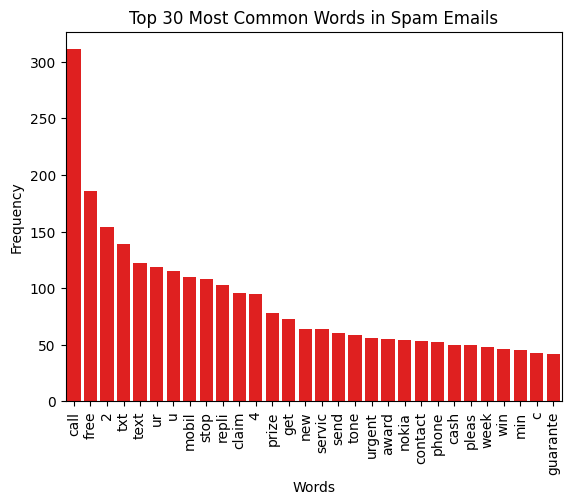

In [ ]:
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0], y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1],color='red')
plt.xticks(rotation='vertical')
plt.title("Top 30 Most Common Words in Spam Emails")
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

In [ ]:
ham_corpus = []
for msg in df4[df4['target'] == 0]['transformed_message'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [ ]:
print(len(set(ham_corpus)))
print(len(ham_corpus))

5459
35940


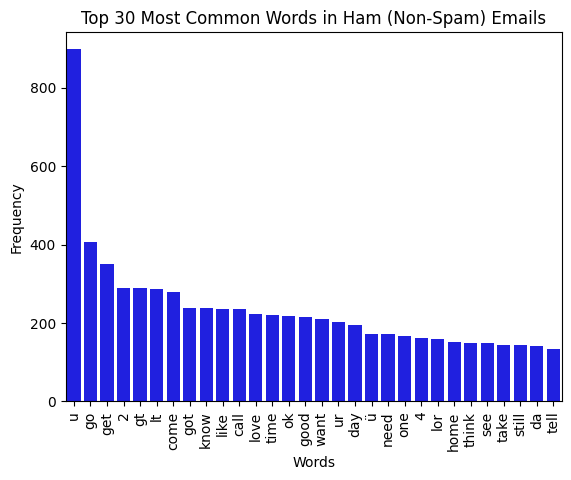

In [ ]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0], y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1],color='blue')
plt.xticks(rotation='vertical')
plt.title("Top 30 Most Common Words in Ham (Non-Spam) Emails")
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

# 3. Text Vectorization / Model Input Preparation

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
# tfidf = TfidfVectorizer(max_features=1000)
tfidf = TfidfVectorizer()

In [ ]:
# X = cv.fit_transform(df4['transformed_message']).toarray() best_model-bnb with acc - 0.9718992248062015 prec - 0.9711538461538461
X = tfidf.fit_transform(df4['transformed_message']).toarray()

In [ ]:
X.shape

(5157, 6781)

In [ ]:
y = df4['target'].values

# 4. Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

# 5. Model Training

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8691860465116279
[[787 118]
 [ 17 110]]
0.4824561403508772


In [ ]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9612403100775194
[[905   0]
 [ 40  87]]
1.0


In [ ]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9718992248062015
[[902   3]
 [ 26 101]]
0.9711538461538461


**Model Comparison Summary**

| Vectorizer        | Best Model     | Accuracy   | Precision  |
|------------------|----------------|------------|------------|
| TF-IDF           | MultinomialNB  | **0.9612** | **1.0**    |
| CountVectorizer  | BernoulliNB    | **0.9719** | **0.9711** |


**Conclusion:** TF-IDF + MultinomialNB performs best overall, Since precision is crucial in spam detection (to avoid marking genuine emails as spam), I selected MNB as model for next steps.


#### Choosing the optimal value for the max_features parameter of TfidfVectorizer

In [ ]:
lst_max_feat=[800,900,950,1000,1100,1200,1400,1500,1800,1900,2000,3000,3100,3200]
res_max_feat=[]
for max_f in lst_max_feat:
    tfidf = TfidfVectorizer(max_features=max_f)
    X = tfidf.fit_transform(df4['transformed_message'])

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=2
    )

    mnb = MultinomialNB()
    mnb.fit(X_train, y_train)

    y_pred = mnb.predict(X_test)

    res_max_feat.append({
        "max_features": max_f,
        "accuracy": accuracy_score(y_test, y_pred),
        "precision": precision_score(y_test, y_pred)
    })

df_results = pd.DataFrame(res_max_feat)
df_results.sort_values(by=['precision','accuracy'],ascending=False)

,max_features,accuracy,precision
3,1000,0.982558,1.000000
4,1100,0.982558,1.000000
2,950,0.981589,1.000000
5,1200,0.980620,1.000000
1,900,0.979651,1.000000
11,3000,0.971899,1.000000
12,3100,0.971899,1.000000
13,3200,0.971899,1.000000
0,800,0.978682,0.990654
6,1400,0.977713,0.990566


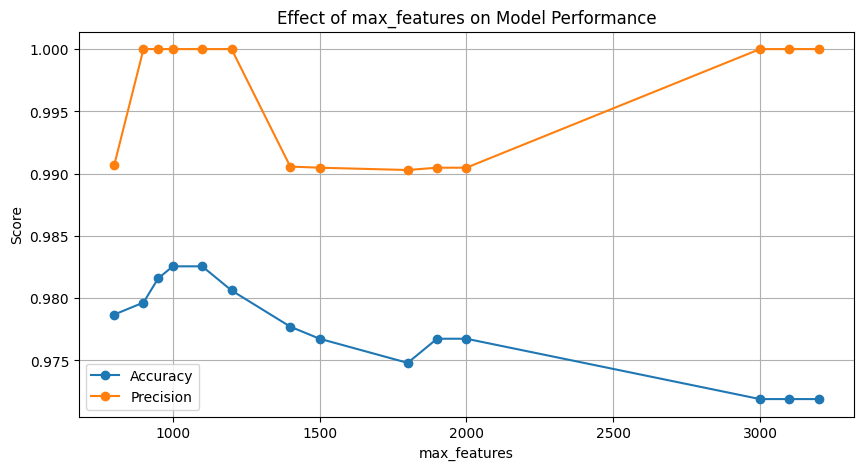

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))

plt.plot(df_results['max_features'], df_results['accuracy'], marker='o', label='Accuracy')
plt.plot(df_results['max_features'], df_results['precision'], marker='o', label='Precision')

plt.xlabel("max_features")
plt.ylabel("Score")
plt.title("Effect of max_features on Model Performance")
plt.grid(True)
plt.legend()
plt.show()


- **max_features = 1000,1100** gives the highest **accuracy(98.25)** and a **precision score of 1.0**, so I will use max_features = 1100 as the final parameter for the TF-IDF vectorizer.

#### Evaluating model accuracy and precision using selected engineered features

In [ ]:
# from sklearn.model_selection import train_test_split

feature_cols = ['transformed_message','num_words','num_sentences','num_upper_word']
X = df4[feature_cols]
y = df4['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=2
)


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
# from sklearn.feature_extraction.text import TfidfVectorizer

ct = ColumnTransformer([
    ('tfidf', TfidfVectorizer(max_features=1100), 'transformed_message'),
    ('num', MinMaxScaler(), ['num_words','num_sentences','num_upper_word'])
])


In [ ]:
X_train_transformed = ct.fit_transform(X_train)
X_test_transformed = ct.transform(X_test)

In [ ]:
# from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
# from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

mnb = MultinomialNB()
mnb.fit(X_train_transformed, y_train)

y_pred = mnb.predict(X_test_transformed)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(precision_score(y_test, y_pred))


0.9806201550387597
[[905   0]
 [ 20 107]]
1.0


**Model Evaluation: Impact of Feature Engineering vs Only TF-IDF**

| Experiment Setup                 | Accuracy   | Precision |
|----------------------------------|------------|-----------|
| With engineered features         | 0.9806     | 1.0       |
| Only TF-IDF (transformed text)   | 0.9826     | 1.0       |

**Since the TF-IDF–only configuration gives slightly better accuracy with the same perfect precision, will choose the TF-IDF–only setup.**

# 3. Model Comparison and Selection

In [ ]:
tfidf=TfidfVectorizer(max_features=1100)

In [ ]:
X = tfidf.fit_transform(df4['transformed_message'])

In [ ]:
y = df4['target'].values

In [ ]:
X.shape

(5157, 1100)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [ ]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return [accuracy,precision]

In [ ]:
X_train.shape

(4125, 1100)

In [ ]:
import pandas as pd

results = []

for name, clf in clfs.items():
    acc,prec = train_classifier(clf, X_train, y_train, X_test, y_test)
    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec
    })

df_results = pd.DataFrame(results)


In [ ]:
df_results.sort_values(by=['Precision','Accuracy'],ascending=False)

,Model,Accuracy,Precision
2,NB,0.982558,1.000000
1,KN,0.921512,1.000000
0,SVC,0.977713,0.990566
5,RF,0.973837,0.980769
9,GBDT,0.954457,0.976190
8,ETC,0.976744,0.972477
10,xgb,0.974806,0.971963
4,LR,0.965116,0.950495
7,BgC,0.960271,0.898148
6,AdaBoost,0.931202,0.878378


- Using only TF-IDF on the message column, without additional engineered features, Naive Bayes performed best with an accuracy of 0.9826 and precision of 1.0.

In [ ]:
import pandas as pd

results_extra_features = []

for name, clf in clfs.items():
    acc,prec = train_classifier(clf, X_train_transformed, y_train, X_test_transformed, y_test)
    results_extra_features.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec
    })

df_results_extra_features = pd.DataFrame(results_extra_features)


In [ ]:
df_results_extra_features.sort_values(by=['Precision','Accuracy'],ascending=False)

,Model,Accuracy,Precision
2,NB,0.980620,1.000000
1,KN,0.926357,1.000000
0,SVC,0.977713,0.990566
5,RF,0.976744,0.981308
9,GBDT,0.956395,0.965909
8,ETC,0.978682,0.964602
10,xgb,0.971899,0.962264
4,LR,0.970930,0.961905
6,AdaBoost,0.944767,0.926829
3,DT,0.950581,0.913043


In [ ]:
merged_df = pd.merge(df_results, df_results_extra_features, on='Model', suffixes=('_tfidf', '_extra_features'))

In [ ]:
merged_df.sort_values(by=['Precision_tfidf','Accuracy_tfidf'],ascending=False)

,Model,Accuracy_tfidf,Precision_tfidf,Accuracy_extra_features,Precision_extra_features
2,NB,0.982558,1.000000,0.980620,1.000000
1,KN,0.921512,1.000000,0.926357,1.000000
0,SVC,0.977713,0.990566,0.977713,0.990566
5,RF,0.973837,0.980769,0.976744,0.981308
9,GBDT,0.954457,0.976190,0.956395,0.965909
8,ETC,0.976744,0.972477,0.978682,0.964602
10,xgb,0.974806,0.971963,0.971899,0.962264
4,LR,0.965116,0.950495,0.970930,0.961905
7,BgC,0.960271,0.898148,0.965116,0.882353
6,AdaBoost,0.931202,0.878378,0.944767,0.926829


- Using TF-IDF on the message column and additional engineered features, Naive Bayes performed best with an accuracy of 0.9806 and precision of 1.0. but accuracy slightly reduced compared to only TF_IDF(transformed message) input.

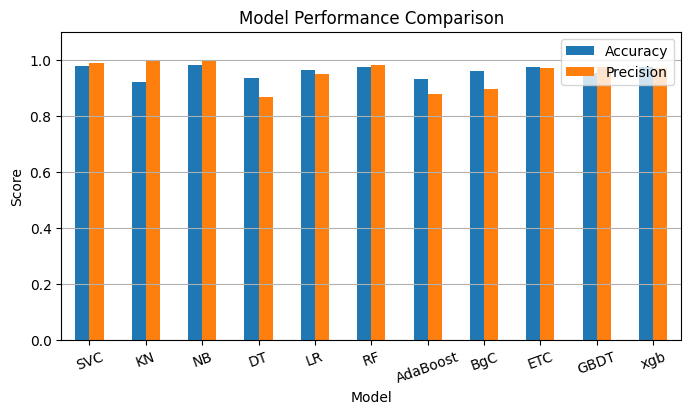

In [ ]:
df_results.plot(x='Model', y=['Accuracy', 'Precision'], kind='bar', figsize=(8,4), ylim=(0,1.1), rot=20)
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.grid(axis='y')
plt.show()

- Even after adding the extra features, Naive Bayes continues to perform the best. Therefore, will select it as final model

### Voting Classifier

In [ ]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [ ]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [ ]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))
print("Precision",classification_report(y_test,y_pred))
print("Precision",confusion_matrix(y_test,y_pred))


Accuracy 0.9835271317829457
Precision 1.0
Precision               precision    recall  f1-score   support

           0       0.98      1.00      0.99       905
           1       1.00      0.87      0.93       127

    accuracy                           0.98      1032
   macro avg       0.99      0.93      0.96      1032
weighted avg       0.98      0.98      0.98      1032

Precision [[905   0]
 [ 17 110]]


In [ ]:
mnb=MultinomialNB()
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

0.9825581395348837
[[905   0]
 [ 18 109]]
1.0
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       905
           1       1.00      0.86      0.92       127

    accuracy                           0.98      1032
   macro avg       0.99      0.93      0.96      1032
weighted avg       0.98      0.98      0.98      1032



- Given that the Voting Classifier offered only a minor accuracy gain over Naive Bayes (0.9835 vs 0.9825), we decided to proceed with the MNB model alone.

### Stacking

In [ ]:

estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()
from sklearn.ensemble import StackingClassifier
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9786821705426356
Precision 0.9565217391304348


- MNB model alone perfomed better than stacking as we want higher precision will proceed with MNB model with precision of 1.

## 4. Cross-validation

In [ ]:
# Cross-validation
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(MultinomialNB(), X, y, cv=5, scoring='precision')
print(f"Cross-val Precision: {cv_scores}")
print(f"Mean CV Precision: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

Cross-val Precision: [0.9826087  0.98165138 1.         0.99082569 0.95327103]
Mean CV Precision: 0.9817 (+/- 0.0313)


- Cross-validation shows consistently high precision across folds (mean = 0.9817, ±0.0313), indicating that the Naive Bayes model is highly precise and robust for spam detection.

## 5. Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'alpha': [0.1, 0.5, 1.0, 1.5, 2.0,3.0,4.0],
    'fit_prior': [True, False]
}

grid_search = GridSearchCV(
    MultinomialNB(),
    param_grid,
    cv=5,
    scoring='precision',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-val score:", grid_search.best_score_)

best_model = grid_search.best_estimator_

Best parameters: {'alpha': 2.0, 'fit_prior': True}
Best cross-val score: 1.0


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, classification_report

y_pred = best_model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Test Accuracy:", acc)

prec = precision_score(y_test, y_pred)
print("Test Precision:", prec)


Test Accuracy: 0.9738372093023255
Test Precision: 1.0


- We get better accuracy with MNB (default paramters) will select it as a final model.

## 6. Model Export

In [ ]:
import pickle

In [ ]:
final_model = MultinomialNB()
final_model.fit(X_train, y_train)


with open('final_spam_classifier.pkl', 'wb') as f:
    pickle.dump(final_model, f)

with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf, f)